# **TF v1 以線性迴歸為例執行參數優化**
w 的起始值是[1.0, 2.0]\
y =w[0] * x + w[1] (就是 y = wx + b)\
error 是殘差平方和的loss function \
train_op是 做一次 optimization (or Gradient Descent)\
(但以上只是定義，還沒做)

In [ ]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior()
import numpy as np

# x and y are placeholders for our training data
x = tf.placeholder("float")
y = tf.placeholder("float")

# w is the variable storing our values. It is initialised with starting "guesses"
# w[0] is the "a" in our equation, w[1] is the "b"
w = tf.Variable([1.0, 2.0], name="w")

# Our model of y = a*x + b
y_model = tf.multiply(x, w[0]) + w[1]

# Our error is defined as the square of the differences
error = tf.square(y - y_model)

# The Gradient Descent Optimizer does the heavy lifting
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)

# Normal TensorFlow - initialize values, create a session and run the model
model = tf.global_variables_initializer()



Instructions for updating:
non-resource variables are not supported in the long term


# **Example 1 線性迴歸測試**

在Session 中做 1000 次\
y_value = 2 * x_value + 6\
(x_value, y_value)是 ground truth\
train_op 就會不斷調整參數\
最後執行 w \
得到近似值 y = 2.257x + 5.868

In [ ]:
with tf.Session() as session:
    session.run(model)
    for i in range(1000):
        x_value = np.random.rand()
        y_value = x_value * 2 + 6
        session.run(train_op, feed_dict={x: x_value, y: y_value})

    w_value = session.run(w)
    print("Predicted model: {a:.3f}x + {b:.3f}".format(a=w_value[0], b=w_value[1]))

Predicted model: 2.191x + 5.902


# **Example 2: Plot Gradient Descent Progress**
在Session 中做 100 次 y_value = 2 * x_value + 6 \
然後繪loss圖

Predicted model: 2.477x + 3.100


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


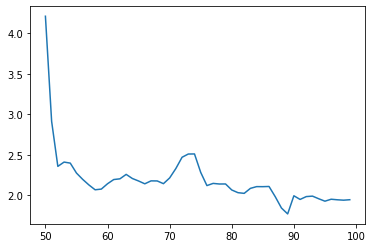

<Figure size 432x288 with 0 Axes>

In [ ]:
errors = []
with tf.Session() as session:
    session.run(model)
    for i in range(100):
        x_train = tf.random_normal((1,), mean=5, stddev=2.0)
        y_train = x_train * 2 + 6
        x_value, y_value = session.run([x_train, y_train])
        _, error_value = session.run([train_op, error], feed_dict={x: x_value, y: y_value})
        errors.append(error_value)
        #print ("i=", i, "x_value:", x_value, "y_value:", y_value, "error val=", error_value)
    w_value = session.run(w)
    print("Predicted model: {a:.3f}x + {b:.3f}".format(a=w_value[0], b=w_value[1]))

import matplotlib.pyplot as plt
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()
plt.savefig("errors.png")